In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.optimize import curve_fit
import math

In [3]:
# 归一化
def normalization (x,mu,sigma):
    x=(x-mu)/sigma
    return x

In [4]:
data=pd.read_csv('../max2021/DOMpeak.csv')
Data=data
Data

,DAY,TIME,MV,TEMP,MAX
0,1/1/2021,5:00:00 PM,14031.281,47.2,57.0
1,1/2/2021,6:00:00 PM,11875.176,50.2,61.0
2,1/3/2021,6:00:00 PM,13197.197,51.3,61.0
3,1/4/2021,7:00:00 AM,14355.365,44.6,54.0
4,1/5/2021,6:00:00 PM,14215.540,38.2,48.0
...,...,...,...,...,...
322,11/19/2021,6:00:00 PM,13524.322,52.5,77.0
323,11/20/2021,7:00:00 AM,14358.527,39.9,64.9
324,11/21/2021,7:00:00 AM,12972.152,48.2,64.9
325,11/22/2021,6:00:00 PM,13441.535,52.3,64.9


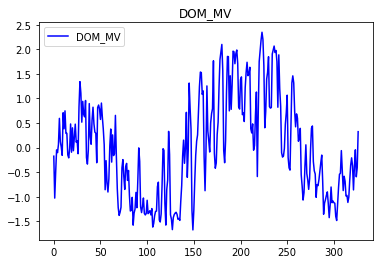

In [5]:
DOM=data['MV'].values
aep=normalization(DOM,DOM.mean(),DOM.std())
# plt.figure(dpi=800)
plt.plot(aep,'b',label='DOM_MV')
plt.title('DOM_MV')
plt.legend(loc="upper left")
# plt.savefig('../picture/DOM.tiff')

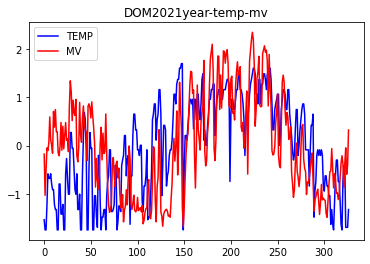

In [6]:
for i in range(len(Data)):
    if Data['MAX'].values[i] >= 59 and Data['MAX'].values[i] <= 64.4:
        Data['MAX'].values[i]=0
    elif Data['MAX'].values[i] < 59:
        Data['MAX'].values[i] =59- Data['MAX'].values[i]
    else:
        Data['MAX'].values[i]=Data['MAX'].values[i]-64.4
# print(Data[:60])
temp=normalization(Data['MAX'].values,Data['MAX'].values.mean(),Data['MAX'].values.std())
mv=normalization(Data['MV'].values,Data['MV'].values.mean(),Data['MV'].values.std())
# plt.figure(dpi=800)
plt.plot(temp,'b',label='TEMP')
plt.plot(mv,'r',label='MV')
plt.title('DOM2021year-temp-mv')
plt.legend(loc="upper left")
# plt.savefig('../picture/DOM2021year-temp-mv.tiff')

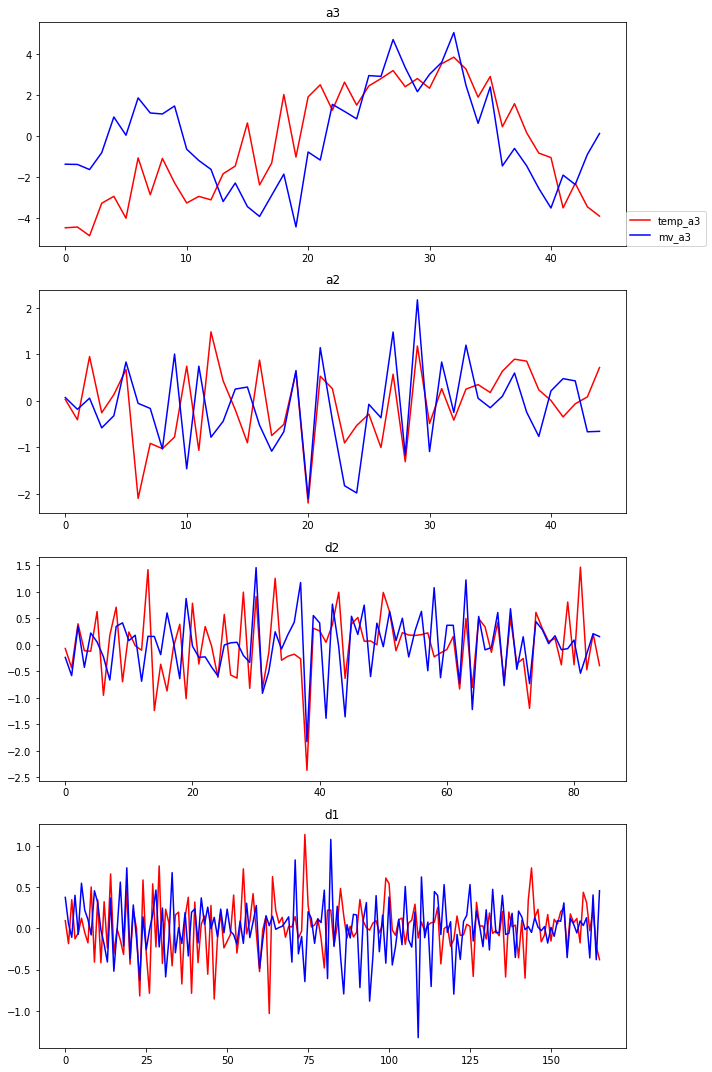

In [8]:
t_a3,t_a2,t_d2,t_d1=pywt.wavedec(temp,'db3',mode='sym',level=3)
a3,a2,d2,d1=pywt.wavedec(mv,'db3',mode='sym',level=3)
plt.figure(figsize=(10,15))
# plt.figure(dpi=800)
plt.subplot(4,1,1)
plt.plot(t_a3,'r',label='temp_a3')
plt.plot(a3,'b',label='mv_a3')
plt.title('a3')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)

plt.tight_layout()
plt.subplot(4,1,2)
plt.plot(t_a2,'r',label='temp_a2')
plt.plot(a2,'b',label='mv_a2')
plt.title('a2')
plt.subplot(4,1,3)
plt.plot(t_d2,'r',label='temp_d2')
plt.plot(d2,'b',label='nv_d2')
plt.title('d2')
plt.subplot(4,1,4)
plt.plot(t_d1,'r',label='temp_d1')
plt.plot(d1,'b',label='mv_d1')
plt.title('d1')
plt.tight_layout()
# plt.savefig('../picture/DOM_a3.tiff')

In [9]:
coeff=[a3,a2,d2,d1]
print(len(a3),len(a2),len(d2),len(d1))

45 45 85 166


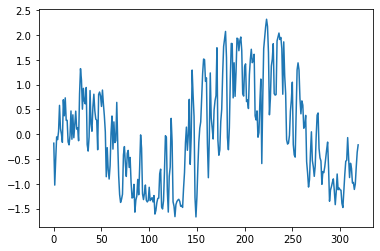

In [10]:
DOM2021=Data[:-7]['MV'].values
dom=normalization(DOM2021,DOM2021.mean(),DOM2021.std())
plt.plot(dom)

44 44 83 162


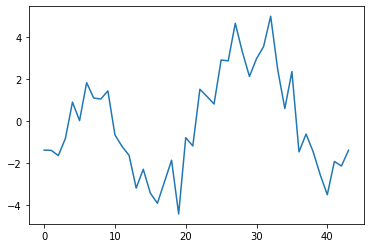

In [11]:
a3_1,a2_1,d2_1,d1_1=pywt.wavedec(dom,'db3',mode='sym',level=3)
print(len(a3_1),len(a2_1),len(d2_1),len(d1_1))
plt.plot(a3_1)

In [12]:
def func(x,a,b,c,a1,b1,a2,b2):
    yvals=a*np.sin(x*np.pi/30.0+b)+a1*np.sin(x*np.pi/21.0+b1)+a2*np.sin(x*np.pi/14.0+b2)+c
    return yvals

In [13]:
x=[]
for i in range(len(t_a3)):
    x.append(float(i))
x=np.array(x)
print(x)
y=a3
fita1,fitb1=curve_fit(func,x,y,[1,1,1,1,1,1,1])
fita1

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


array([-12.91801664,  -0.02029314,   2.88796351, -14.20755181,
         2.22005542,   7.43350198,   0.8975362 ])

a= -12.91801664455596   a1= -14.207551813379741    a2= 7.433501984311114     b= -0.02029313840376045    b1= 2.220055421951843     b2= 0.8975361993247823


Text(0.5, 1.0, 'curve_fit')

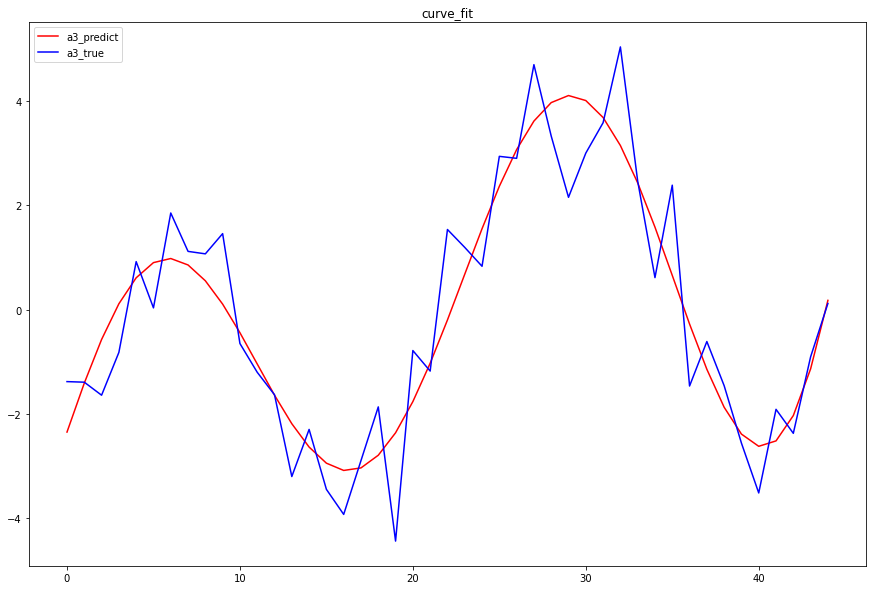

In [14]:
a=fita1[0]
b=fita1[1]
c=fita1[2]
a1=fita1[3]
b1=fita1[4]
a_2=fita1[5]
b2=fita1[6]
print("a=",a,"  a1=",a1,"   a2=",a_2,"    b=",b,"   b1=",b1,"    b2=",b2,)

y_p=func(x,a,b,c,a1,b1,a_2,b2)
plt.figure(figsize=(15,10))
# plt.figure(dpi=800)
plt.plot(x,y_p,'r',label='a3_predict')
plt.plot(y,'b',label='a3_true')
plt.legend(loc="upper left")
plt.title('curve_fit')
# plt.savefig('../picture/DOMcurve_fit.tiff')

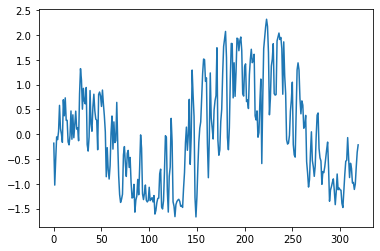

In [15]:
DOM2021=Data[:-7]['MV'].values
dom=normalization(DOM2021,DOM2021.mean(),DOM2021.std())
plt.plot(dom)

44 44 83 162


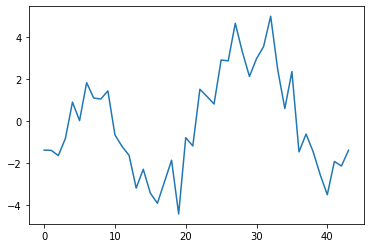

In [16]:
a3_1,a2_1,d2_1,d1_1=pywt.wavedec(dom,'db3',mode='sym',level=3)
print(len(a3_1),len(a2_1),len(d2_1),len(d1_1))
plt.plot(a3_1)

In [17]:
x_1=[]
for i in range(len(a3_1)):
    x_1.append(float(i))
x_1=np.array(x_1)
print(x)
y_1=a3_1
fita,fitb=curve_fit(func,x_1,y_1,[1,1,1,1,1,1,1])
fita

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


array([-12.00292376,   0.01693452,   2.54100109,  13.38883098,
        -0.89338717,   7.22361693,   0.91264796])

In [18]:
a=fita[0]
b=fita[1]
c=fita[2]
a1=fita[3]
b1=fita[4]
a_2=fita[5]
b2=fita[6]
print("a=",a,"  a1=",a1,"   a2=",a_2,"    b=",b,"   b1=",b1,"    b2=",b2,"    c=",c)

a= -12.002923757141065   a1= 13.38883098453713    a2= 7.223616928671425     b= 0.016934520865176467    b1= -0.8933871737975347     b2= 0.9126479578871395     c= 2.5410010890325165


In [19]:
a3_p=func(len(a3_1),a,b,c,a1,b1,a_2,b2)
print(a3[-1])
a3_p

0.11636850078124375


-0.06374275106231542

In [20]:
def MAPE(predict,real):
    mape =sum(abs((predict-real)/predict))/len(predict)
    return mape
def ERROR(predict,real):
    E=(predict-real)/predict
    return E
def MSE(predict,real):
    mse=float((predict-real)**2/len(predict))
    return mse

[ 1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016  1.00829016
  1.00829016  1.00829016  1.00829016  1.00829016  0.90538592  0.66724675
 -0.35847124 -0.73852701]
[ 0.23763034  0.00955375 -0.34428329 -0.06221817  0.08650762  0.71750049]
[ 0.991778    0.991778    0.991778    0.991778    0.991778    0.991778
  0.991778    0.991778    0.991778    0.991778    0.991778    0.991778
  0.991778    0.991778    0.991778    0.991778    0.991778    0.991778
  0.991778    0.991778    0.991778    0.991778    0.991778    0.991778
  0.991778    0.991778    0.991778    0.991778    0.991778    0.991778
  0.991778    0.991778    0.991778

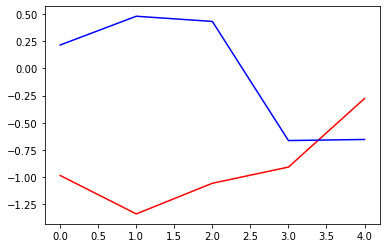

In [21]:
print(a2[:-1]/a2_1)
q=t_a2[-6:]
print(q)
theta1=[]  # 存放k1,k2,k3,k4,k5
for i in range(1,len(q)):
    q2=q[i]-q[i-1]
    theta1.append(q2)
q3=a2_1[-5]
q4=[]
for i in range(5):
    q3+=(theta1[i])
    q4.append(q3)
lA2_new=a2_1[:-4].tolist()
for i in range(len(q4)):
    lA2_new.append(q4[i])
A2_new=np.array(lA2_new)
print(A2_new/a2)
print(a2[-5:])
A2_new[-5:]
plt.plot(A2_new[-5:],'r')
plt.plot(a2[-5:],'b')

In [22]:
print(a,a1,a_2,b,b1,b2,c)
a_new=a-1.5+3*np.random.rand(1000)  # +-1.5
a1_new=-1+4*np.random.rand(1000)+a1
a2_new=-1+2*np.random.rand(1000)+a_2
b_new=-0.5+np.random.rand(1000)+b   # +-0.5
b1_new=-0.5+np.random.rand(1000)+b1
b2_new=-0.5+np.random.rand(1000)+b2
c_new=-0.5+np.random.rand(1000)+c

-12.002923757141065 13.38883098453713 7.223616928671425 0.016934520865176467 -0.8933871737975347 0.9126479578871395 2.5410010890325165


In [23]:
mape=np.zeros((1000,))
excel=np.zeros((1000,))
true=mv[-7:]
print(true)
for i in range(1000):
    xi=[a_new[i],a1_new[i],a2_new[i],b_new[i],b1_new[i],b2_new[i],c_new[i]]
    y_predict_1=func(len(a3_1),a_new[i],b_new[i],c_new[i],a1_new[i],b1_new[i],a2_new[i],b2_new[i])
    y_predict_2=func(len(a3_1)-1,a_new[i],b_new[i],c_new[i],a1_new[i],b1_new[i],a2_new[i],b2_new[i])
#     print(y_predict_1,y_predict_2)
    l=a3.tolist()
    l[-1]=y_predict_2
    l.append(y_predict_1)
    l_new=np.array(l)
    
#     q=t_a2[-6:]
#     theta=[]
#     for j in range(1,len(q)):
#         q2=q[j]-q[j-1]
#         theta.append(q2)
#     q3=a2_1[-5]
#     q4=[]
#     for j in range(len(q4)):
#         lA2_new.append(q4[j])
#     A2_new=np.array(lA2_new)
    
    coeff_new=[l_new,a2,d2,d1]
    Denoised=pywt.waverec(coeff_new,'db3')
    mape[i]=MAPE(Denoised[-7:],true)

[-0.37825598 -0.86209554 -0.37602049 -0.04595785 -0.59449279 -0.4087761
  0.32382008]


Text(0.5, 1.0, 'a week of error')

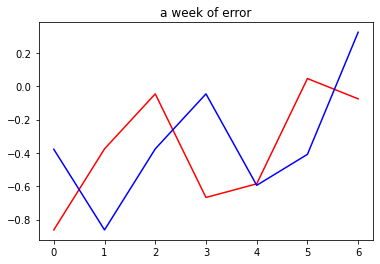

In [24]:
#error
# plt.figure(dpi=800)
plt.plot(Denoised[-7:],'r-')
plt.plot(true,'b-')
plt.title('a week of error')
# plt.savefig('../picture/a_week_of_error')

In [25]:
df=pd.DataFrame({'a':a_new,'b':b_new,'c':c_new,'a1':a1_new,'b1':b1_new,'a2':a2_new,'b2':b2_new,'mape':mape})
# df.to_csv('../picture/a-mape.csv')

In [26]:
A=np.zeros((1000,))
B=np.zeros((1000,))
C=np.zeros((1000,))
for i in range(len(a_new)):
    A[i]=(a_new[i]+a1_new[i]+a2_new[i])/max(a_new[i],a1_new[i],a2_new[i])
    B[i]=(b_new[i]+b1_new[i]+b2_new[i])/max(b_new[i],b1_new[i],b2_new[i])
    C[i]=c_new[i]

def MIN_MAX(x,x_max,x_min):
    norm=(x-x_min)/(x_max-x_min)
    return norm

A_norm=MIN_MAX(A,A.max(),A.min())
B_norm=MIN_MAX(B,B.max(),B.min())
C_norm=MIN_MAX(C,C.max(),C.min())
# mape=normalization(mape,mape.mean(),mape.std())
# mape
df2=pd.DataFrame({'a':A_norm,'b':B_norm,'c':C_norm,'mape':mape})
# df2

-10.92949831003972 8.479937387315074 0.602405749061687


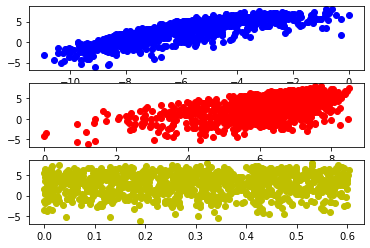

In [27]:
alpha = 0.001

epoch = 1

theta0 = 0.1
theta1 = 0.1
theta2 = 0.1

diff_all = 0
diff_a = 0
diff_b = 0
diff_c = 0

error_pre = 0
error_post = 0

Threshold = 0.001
while epoch < 10000:

    for i in range(len(mape)):
        diff_all += theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i]
        diff_a += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*A_norm[i]
        diff_b += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*B_norm[i]
        diff_c += (theta0*A_norm[i]**2 + theta1*B_norm[i] + theta2*C_norm[i] - mape[i])*C_norm[i] 

    #更新参数theta0, theta1, theta2

    theta0 = theta0 - alpha/len(mape)*diff_a
    theta1 = theta1 - alpha/len(mape)*diff_b
    theta2 = theta2 - alpha/len(mape)*diff_c

    #判断后向误差是否满足要求

    for j in range(len(mape)):
        error_post += (theta0*A_norm[j]**2 + theta1*B_norm[j] + theta2*C_norm[j] - mape[j])**2/(2*len(mape))

    if abs(error_post-error_pre)<Threshold:
        epoch = 10000
    else: 
        error_pre = error_post
        epoch += 1

Pre = theta0*A_norm**2 + theta1*B_norm + theta2*C_norm

plt.subplot(3,1,1)
plt.plot(theta0*A_norm,Pre,'bo')
plt.subplot(3,1,2)
plt.plot(theta1*B_norm,Pre,'ro')
plt.subplot(3,1,3)
plt.plot(theta2*C_norm,Pre,'yo')

print(theta0, theta1, theta2)
# df=pd.DataFrame({'a':theta0*Param_a,'b':theta1*Param_b,'c':theta2*Param_c,'error':MAPE-Pre,'Pre':Pre,'MAPE':MAPE})
# df.to_csv('1.csv')
plt.show()

In [28]:
def Return(x,x_max,x_min):
    origin = x*(x_max-x_min)+x_min
    return origin

In [29]:
A_origin=Return(theta0*A_norm,A.max(),A.min())
B_origin=Return(theta1*B_norm,B.max(),B.min())
C_origin=Return(theta2*C_norm,C.max(),C.min())
v=np.sort(A_origin)
v1=np.split(v,10)
v1[0].mean()

-3.30503348413587

In [30]:
df3=pd.DataFrame({'a':A_origin,'b':B_origin,'c':C_origin,'mape':mape})
# df4=df3[(df3['mape'].values<1)]
# df4
df3

,a,b,c,mape
0,-1.768939,27.799484,2.047135,2.422820
1,-1.868022,6.212185,2.247124,1.696583
2,-1.170967,19.488046,2.188014,1.704892
3,-0.995219,25.935393,2.106922,1.811786
4,-2.895013,25.392674,2.389126,1.713781
...,...,...,...,...
995,-1.045441,7.740379,2.457642,2.941126
996,-1.625883,30.252927,2.280353,3.256811
997,-1.022754,22.026775,2.237471,1.943664
998,-1.489408,13.053621,2.567838,1.922720


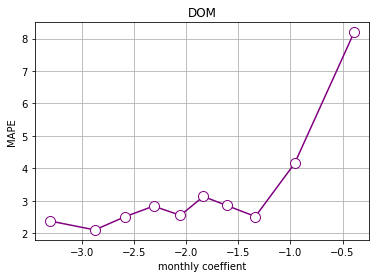

In [31]:
df3_a=df3.sort_values(by='a',ascending=True)
a_df=np.zeros(10,)
mape_df=np.zeros(10,)
for i in range(10):
    juna=df3_a[i*100:100*(i+1)]['a'].values.mean()
    a_df[i]=juna
    junmape=df3_a[i*100:100*(i+1)]['mape'].values.mean()
    mape_df[i]=junmape
# plt.figure(dpi=800)
plt.plot(a_df,mape_df,'purple',marker='o',markerfacecolor='white',markersize=10)
plt.title('DOM')
plt.xlabel('monthly coeffient')
plt.ylabel('MAPE')
# plt.ylim(0,7)
plt.grid()#添加网格
# plt.savefig('../picture/DOM_a.tiff')

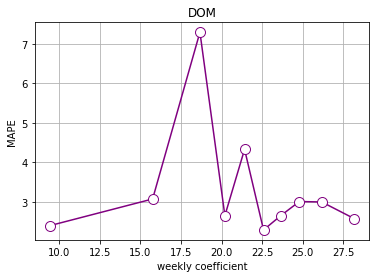

In [32]:
df3_b=df3.sort_values(by='b',ascending=True)
b_df=np.zeros(10,)
b_mape_df=np.zeros(10,)
for i in range(10):
    junb=df3_b[i*100:100*(i+1)]['b'].values.mean()
    b_df[i]=junb
    b_junmape=df3_b[i*100:100*(i+1)]['mape'].values.mean()
    b_mape_df[i]=b_junmape
# plt.figure(dpi=800)
plt.plot(b_df,b_mape_df,'purple',marker='o',markerfacecolor='white',markersize=10)
plt.title('DOM')
plt.xlabel('weekly coefficient')
plt.ylabel('MAPE')
# plt.ylim(0,7)
plt.grid()
# plt.savefig('../picture/DOM_b.tiff')

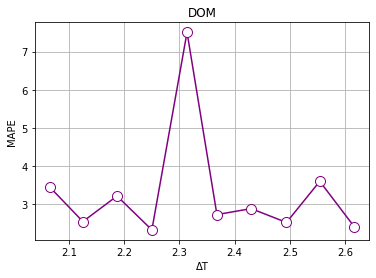

In [33]:
df3_c=df3.sort_values(by='c',ascending=True)
c_df=np.zeros(10,)
c_mape_df=np.zeros(10,)
for i in range(10):
    junc=df3_c[i*100:100*(i+1)]['c'].values.mean()
    c_df[i]=junc
    c_junmape=df3_c[i*100:100*(i+1)]['mape'].values.mean()
    c_mape_df[i]=c_junmape
# plt.figure(dpi=800)
plt.plot(c_df,c_mape_df,'purple',marker='o',markerfacecolor='white',markersize=10)
plt.title('DOM')
plt.xlabel('ΔT')
plt.ylabel('MAPE')
# plt.ylim(0,7)
plt.grid()
# plt.savefig('../picture/DOM_c.tiff')

## ARIMA

In [34]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [35]:
def tagADF(t):
    result = pd.DataFrame(index=[
        "Test Statistic Value", "p-value", "Lags Used",
        "Number of Observations Used",
        "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"
    ], columns=['value'])

    result['value']['Test Statistic Value'] = t[0]
    result['value']['p-value'] = t[1]   #表示多少的概率该序列非平稳
    result['value']['Lags Used'] = t[2]
    result['value']['Number of Observations Used'] = t[3]
    result['value']['Critical Value(1%)'] = t[4]['1%']
    result['value']['Critical Value(5%)'] = t[4]['5%']
    result['value']['Critical Value(10%)'] = t[4]['10%']
    return result

In [36]:
MV=pd.DataFrame(Data[:-7]['MV'])
MV

,MV
0,14031.281
1,11875.176
2,13197.197
3,14355.365
4,14215.540
...,...
315,11652.701
316,11931.743
317,12811.373
318,13568.046


In [37]:
adf_Data = adfuller(MV.iloc[:,0])
adf_Data

(-1.3361043941141946,
 0.6124969773215129,
 12,
 307,
 {'1%': -3.4518314994261337,
  '5%': -2.8710009653519166,
  '10%': -2.571810878948318},
 5167.10689755752)

In [38]:
diff = MV.diff(1).dropna()

In [39]:
#通过传入限定的最大值，得到最佳的p值和q值
order = sm.tsa.arma_order_select_ic(diff,ic=['aic'])['aic_min_order']
print(order)

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

(2, 1)


In [40]:
#ARMA模型建模和训练
ARMAmodel = sm.tsa.ARMA(diff, order).fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn

In [41]:
#得到模型评分
delta = ARMAmodel.fittedvalues - diff.iloc[:0]
score = 1- delta.var() / diff.var()

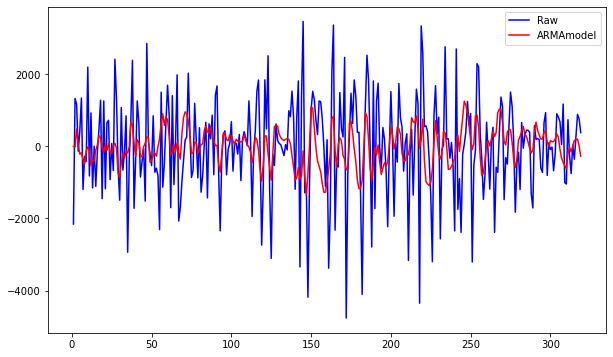

In [42]:
#绘图得到拟合曲线
plt.figure(figsize=(10, 6))
plt.plot(diff, 'b', label='Raw')
plt.plot(ARMAmodel.fittedvalues, 'r', label='ARMAmodel')
plt.legend()
# plt.show()

In [43]:
p = ARMAmodel.forecast(7)[0]

In [44]:
#将差分值进行还原
def revert(diffValues, *lastValue):
    for i in range(len(lastValue)):
        result = []
        lv = lastValue[i]
        for dv in diffValues:
            lv = dv + lv
            result.append(lv)
        diffValues = result
    return diffValues
#需要输入序列的最后一个值
last=MV['MV'][-1:].values.flatten()[0]

In [45]:
tamf=Denoised[-7:]*DOM.std()+DOM.mean()
tamf

array([12295.809     , 13524.322     , 14358.527     , 12787.80569253,
       12994.4035393 , 14591.14067846, 14283.40798138])

6.6589873354198215


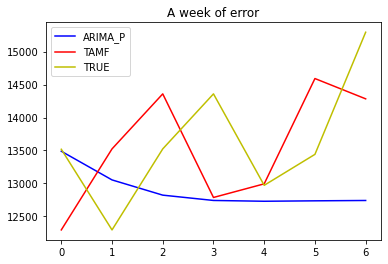

In [46]:
mv_p = revert(p, last)
mv_r = Data[-7:]['MV'].values.flatten()
# 定义
def MAPE(predict,real):
    mape =sum(abs((predict-real)/real))*100/len(predict)
    return mape
mape=MAPE(mv_p,mv_r)

print(mape)

# plt.figure(dpi=800)
plt.plot(mv_p,'b',label='ARIMA_P')
plt.plot(tamf,'r',label='TAMF')
plt.plot(mv_r,'y',label='TRUE')
plt.title('A week of error')
plt.legend(loc="upper left")
# plt.savefig('../picture/A Week of error.tiff')

In [47]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pywt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [48]:
a2,d2,d1=pywt.wavedec(mv[:-7],'db3',mode='sym',level=2)
coeff=[a2,d2,d1]

In [49]:
from scipy.optimize import curve_fit
import math 
def MAPE(predict,real):
    mape =abs((predict-real)/real)/len(predict)
    return mape
def ERROR(predict,real):
    E=(predict-real)/predict
    return E
def MSE(predict,real):
    mse=(predict-real)**2/len(predict)
    return mse

In [50]:
order_a2=sm.tsa.arma_order_select_ic(a2,ic=['aic'])['aic_min_order']
order_d2=sm.tsa.arma_order_select_ic(d2,ic=['aic'])['aic_min_order']
order_d1=sm.tsa.arma_order_select_ic(d1,ic=['aic'])['aic_min_order']

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [51]:
model_a2=ARMA(a2,order_a2)
model_d2=ARMA(d2,order_d2)
model_d1=ARMA(d1,order_d1)

result_a2=model_a2.fit()
result_d2=model_d2.fit()
result_d1=model_d1.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


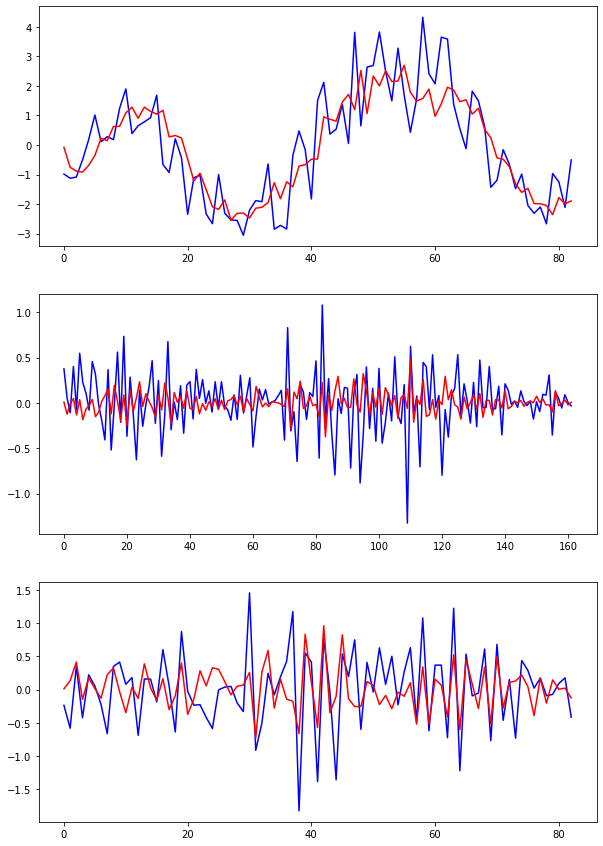

In [52]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(a2,'blue')
plt.plot(result_a2.fittedvalues,'red')
plt.subplot(3,1,2)
plt.plot(d1,'blue')
plt.plot(result_d1.fittedvalues,'red')
plt.subplot(3,1,3)
plt.plot(d2,'blue')
plt.plot(result_d2.fittedvalues,'red')

In [53]:
a2_a11,d2_a11,d1_a11 =pywt.wavedec(mv,'db3',mode='sym',level=2)
print(len(a2_a11),len(d2_a11),len(d1_a11))

85 85 166


In [54]:
delta=[len(a2_a11)-len(a2),len(d2_a11)-len(d2),len(d1_a11)-len(d1)]
delta

[2, 2, 4]

In [55]:
pa2=model_a2.predict(params=result_a2.params,start=1,end=len(a2)+delta[0])
pd2=model_d2.predict(params=result_d2.params,start=1,end=len(d2)+delta[1])
pd1=model_d1.predict(params=result_d1.params,start=1,end=len(d1)+delta[2])
print(len(pa2),len(pd2),len(pd1))

85 85 166


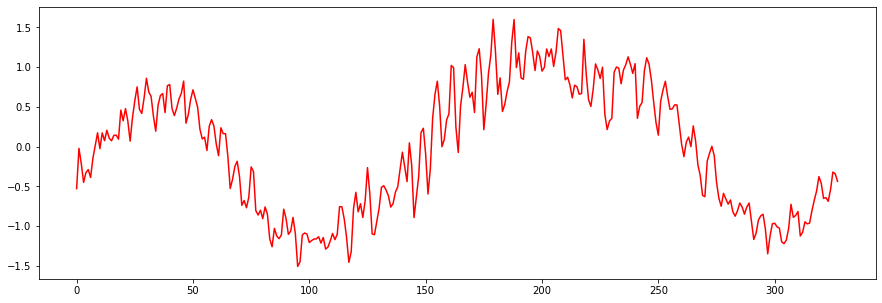

In [59]:
coeff_new=[pa2,pd2,pd1]
# print(coeff_new)
denoised_index = pywt.waverec(coeff_new,"db3")

plt.figure(figsize=(15,5))

plt.plot(denoised_index,'red')

In [60]:
WARIMA=denoised_index[-8:-1]*DOM.std()+DOM.mean()  

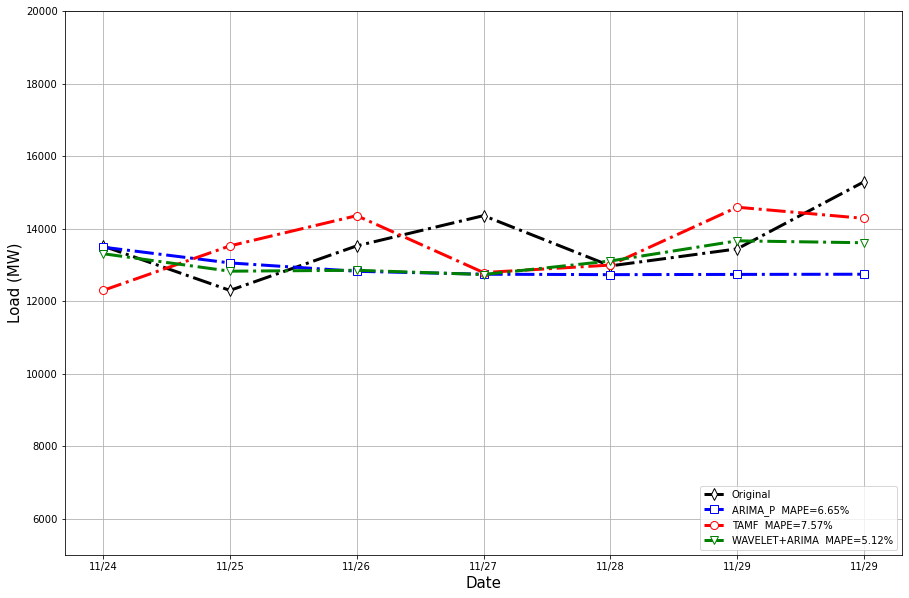

In [61]:
# plt.figure(dpi=800)
plt.figure(figsize=(15,10))
plt.plot(mv_r,'black',label='Original',linestyle='-.',linewidth=3.0,marker='d',markerfacecolor='white',markersize=8)
plt.plot(mv_p,'b',linestyle='-.',linewidth=3.0,label='ARIMA_P  MAPE=6.65%',marker='s',markerfacecolor='white',markersize=8)
plt.plot(tamf,'r',label='TAMF  MAPE=7.57%',linestyle='-.',linewidth=3.0,marker='o',markerfacecolor='white',markersize=8)
plt.plot(WARIMA,'g',label='WAVELET+ARIMA  MAPE=5.12%',linestyle='-.',linewidth=3.0,marker='v',markerfacecolor='white',markersize=8)
# plt.title('A week of error')
plt.legend(loc="lower right")
xticks=[0,1,2,3,4,5,6]
xticklabes = ['11/24', '11/25', '11/26', '11/27',  '11/28', '11/29', '11/29']
plt.xticks(xticks, xticklabes, size=10, color='black')
plt.xlabel('Date', size=15)
plt.ylabel('Load (MW)', size=15)
plt.ylim(5000,20000)
plt.grid()
# plt.savefig('../picture/DOM.tiff')

In [62]:
def MAPE(predict,real):
    mape =sum(abs((predict-real)/real))/len(predict)*100
    return mape
arimamape=np.zeros((7,))
tamfmape=np.zeros((7,))
warimamape=np.zeros((7,))
for i in range(7):
    arimamape[i]=MAPE(mv_p[:i+1],mv_r[:i+1])
    tamfmape[i]=MAPE(tamf[:i+1],mv_r[:i+1])
    warimamape[i]=MAPE(WARIMA[:i+1],mv_r[:i+1])
ddf=pd.DataFrame({'ARIMA':arimamape,"TAMF":tamfmape,"WARIMA":warimamape})
ddf

,ARIMA,TAMF,WARIMA
0,0.221047,9.045733,1.557280
1,3.193570,9.518524,2.934031
2,3.857330,8.401744,3.614721
3,5.706756,9.036131,5.539538
4,4.938070,7.263212,4.640326
5,4.988726,7.478116,4.142680
6,6.658987,7.353003,5.122699
